<h4>Linear Regression </h4>

Brief derivation of OLS meethod of Linear Regression. 
There are many alternate derivations 
Assume a system of linear equations or assume a set of points with the goal of 
drawing a line through them. 



<img src="linreg.png" height="300", width="300">

For a set of input points$x_i, y_i$ define a least squares distance measure: 
    
$error = (y_i-x_i)^2$

Take the derivative to minimize this error and set it to 0 to calculate the coefficients:
$$



In [4]:
import numpy as np

pos_examples1 = np.array([[0.871429,0.624585,1],[ -0.020000,-0.923588,1],
                         [0.362857,-0.318937,1],[0.888571,-0.870432,1]])

neg_examples1 = np.array([[-0.80857,0.83721,1],[0.35714,0.85050,1],
                         [-0.75143,-0.73090,1],[-0.30000,0.12625,1]
                        ])







The simplest neuron is a linear neuron used for performing linear separation. 


<img src="linearnn1.png">

We define the operation of the neuron as multiplying the input with a weight: $w_i$. 
Define the loas function as the expected output minus the actual squared. $loss = \frac{1}{2}\sum\limits_{i=1}^n(t_n-y_n)^2$. 
We are going to take the sum of all the errors for all the sample points and update the weights. This is batch training. 
If we process 1 sample at at time this is online training. To find the values of weights we use gradient descent. 


We want to minimize loss as a function of the weights. Using the chain rule we can expand the partial deriviative WRT w
as follows: 

$\frac{\partial loss}{\partial w_i} = \frac{\partial y_i}{\partial w_i} \cdot \frac{\partial loss}{\partial y_i}$

$\frac{\partial loss}{\partial w_i} = \frac{1}{2} \cdot (2)(t_i-y_i)(-1) = -(t_i-y_i)$

$y_i = \sum\limits_{i=1}^N w_ix_i$ so $\frac{\partial y_i}{\partial w_i} = \sum\limits_{i=1}^N x_i$

$w_{i+1} = w_i+\delta \cdot w_i$

$\delta w_i = \epsilon \cdot \frac{\partial loss}{\partial w_i} $
where $\epsilon$ is the learning rate

$\delta w_i = \epsilon \cdot \sum\limits_{i=1}^N x_i(t_i-y_i)$

Set the initial weights to a random value with variance=1 and compute the delta w for all the training samples and
keep iterating until the weight values converge. 








<class 'sklearn.datasets.base.Bunch'>
iris.feature_names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris.data: [[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.

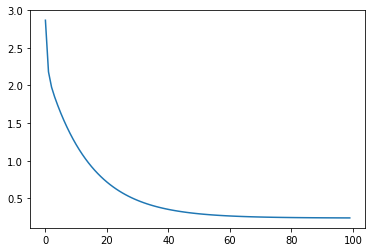

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

iris = datasets.load_iris()
print (type(iris))
print( "iris.feature_names:",iris.feature_names)
print ("iris.data:",iris.data)
print("iris.target_names:", iris.target_names)
print (iris.target)

#pick first and last columns to do regression on
x = np.array([x[3] for x in iris.data])
y = np.array([y[0] for y in iris.data])

print("x:",x)
print("y:",y)

print("x shape:",x.shape)
print("y shape:",y.shape)

global_step = tf.Variable(0, trainable=False,name="global_step")

#model
x_ = tf.placeholder(tf.float32, shape=[None,1])
y_ = tf.placeholder(tf.float32, shape=[None,1])

m = tf.Variable(tf.zeros(shape=[1,1]))
b = tf.Variable(tf.zeros(shape=[1,1]))

output = tf.add(tf.matmul(x_,m),b)

loss = tf.reduce_mean(tf.square(y_ - output))

print("global_step:", global_step)
learning_rate = tf.train.exponential_decay(
    learning_rate=0.1, global_step=global_step,
    decay_steps=100, decay_rate=0.001,name="learning_rate")
print("learning_rate:", learning_rate)

sess = tf.Session()
init = tf.global_variables_initializer()

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
rand_index = np.random.choice(len(x), size=len(x))
#print("rand_index:", rand_index)
rand_x = np.transpose([x[rand_index]])
rand_y = np.transpose([y[rand_index]])
x_transpose = np.transpose(x)
y_transpose = np.transpose(y)
#print("rand_x:",rand_x)
#print("rand_y:",rand_y)
sess.run(init)
sess.run(optimizer, feed_dict={x_: rand_x, y_: rand_y})
graph_loss = []
for epochs in range(100):
    sess.run(optimizer, feed_dict={x_: rand_x, y_: rand_y})
    epoch_loss = sess.run(loss,feed_dict={x_: rand_x, y_: rand_y} )
    graph_loss.append(epoch_loss)
    print("epochs:",epochs," epoch_loss:",epoch_loss," m:",sess.run(m)," b:",sess.run(b))
x=[]
x.extend(range(100))
import matplotlib.pyplot as plt
plt.plot(x,graph_loss)
plt.show()

In [ ]:
<h4>Results Discussion</h4>
<p></p>
The results for fixed learning rate of .1 are here:
    <img src="fixlearn.png">
<p></p>
The results for fixed learning rate decay starting at .1 are here:
    <img src="decaylearn.png">

<p></p>
Is the lower loss for the fixed learning rate mean it is a better solution? 
<p></p>




Logistic Regression for classification. Simplest case for 2 classes. 



Logistic Neuron
$y = \frac{1}{1+exp(-z)}$


$\frac{dy}{dz}=y(1-y)$
    
    
    



In [51]:
import tensorflow as tf


iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

print("X:",X)
print("Y:",Y)





X: [[ 5.1  3.5]
 [ 4.9  3. ]
 [ 4.7  3.2]
 [ 4.6  3.1]
 [ 5.   3.6]
 [ 5.4  3.9]
 [ 4.6  3.4]
 [ 5.   3.4]
 [ 4.4  2.9]
 [ 4.9  3.1]
 [ 5.4  3.7]
 [ 4.8  3.4]
 [ 4.8  3. ]
 [ 4.3  3. ]
 [ 5.8  4. ]
 [ 5.7  4.4]
 [ 5.4  3.9]
 [ 5.1  3.5]
 [ 5.7  3.8]
 [ 5.1  3.8]
 [ 5.4  3.4]
 [ 5.1  3.7]
 [ 4.6  3.6]
 [ 5.1  3.3]
 [ 4.8  3.4]
 [ 5.   3. ]
 [ 5.   3.4]
 [ 5.2  3.5]
 [ 5.2  3.4]
 [ 4.7  3.2]
 [ 4.8  3.1]
 [ 5.4  3.4]
 [ 5.2  4.1]
 [ 5.5  4.2]
 [ 4.9  3.1]
 [ 5.   3.2]
 [ 5.5  3.5]
 [ 4.9  3.1]
 [ 4.4  3. ]
 [ 5.1  3.4]
 [ 5.   3.5]
 [ 4.5  2.3]
 [ 4.4  3.2]
 [ 5.   3.5]
 [ 5.1  3.8]
 [ 4.8  3. ]
 [ 5.1  3.8]
 [ 4.6  3.2]
 [ 5.3  3.7]
 [ 5.   3.3]
 [ 7.   3.2]
 [ 6.4  3.2]
 [ 6.9  3.1]
 [ 5.5  2.3]
 [ 6.5  2.8]
 [ 5.7  2.8]
 [ 6.3  3.3]
 [ 4.9  2.4]
 [ 6.6  2.9]
 [ 5.2  2.7]
 [ 5.   2. ]
 [ 5.9  3. ]
 [ 6.   2.2]
 [ 6.1  2.9]
 [ 5.6  2.9]
 [ 6.7  3.1]
 [ 5.6  3. ]
 [ 5.8  2.7]
 [ 6.2  2.2]
 [ 5.6  2.5]
 [ 5.9  3.2]
 [ 6.1  2.8]
 [ 6.3  2.5]
 [ 6.1  2.8]
 [ 6.4  2.9]
 [ 6.6  3. ]
 [ 6.8  2

<h4>Softmax regression model/classification and cross entropy</h4>


For more than 2 classes we can use a combination of logistic regression models or softmax regression which is the
generalization of logistic regression to multiple classes. 


We saw the logistic function used to output probability and 
$\{ (x^{(1)}, y^{(1)}), \ldots, (x^{(m)}, y^{(m)}) \}$ from a dataset with input X, class Y per input and with m trained 
samples. Using Ng's notation our hypothesis/logistic is: 
$
\begin{align}
h_\theta(x) = \frac{1}{1+\exp(-\theta^Tx)},
\end{align}
$
where $\theta$ is our weight matrix. Hinton uses notation $y=\frac{1}{1+exp(-z)}$

For multiple classes logistc loss also called the cross entropy loss function is: 
    

$
\begin{align}
J(\theta) = -\frac{1}{m} \left[ \sum_{i=1}^m y^{(i)} \log h_\theta(x^{(i)}) + (1-y^{(i)}) \log (1-h_\theta(x^{(i)})) \right]
\end{align}
$

which is derived from the law of total probability for multiple classes. Ecah class is reprented by $y_k$ where for 10 classes k would be 1..10

The softmax loss is: 
    
$p(y^{(i)} = j | x^{(i)} ; \theta) = \frac{e^{\theta_j^T x^{(i)}}}{\sum_{l=1}^k e^{ \theta_l^T x^{(i)}} }$

and the derivative of the logistic loss is in Ng notation:
    
$    
\begin{align}
\nabla_{\theta_j} J(\theta) = - \frac{1}{m} \sum_{i=1}^{m}{ \left[ x^{(i)} \left( 1\{ y^{(i)} = j\}  - p(y^{(i)} = j | x^{(i)}; \theta) \right) \right]  }
\end{align}
$

Hinton calls Cross entropy as the right cost function to use for softmax. 


RELU activation function

$ f(x)=max(0,x)$

The RELUa activation function is used in multilayer deep networks, especially CNNs to compensate for vanishing gradients 
during backpropagation. The last layer is a FC layer to turn the output into a probability distribution. One of the problems
with a RELU is returning a 0 causing a multiply by 0 which destroys coefficients. 



In [ ]:
def relu(x):
    """if x>0 1, else 0."""
    return np.maximum(0,x)

def derivative_relu(x):
    if x<=0:
        return 0
    return 1


SELU activation function

$
  selu(x)=\lambda \begin{cases}
               x \;for \;x>0\\
               \alpha e^x-a \;for \;x<0\\
            \end{cases}
$



$
  \frac {\partial selu(x)}{\partial x}=\lambda \begin{cases}
               1 \;for \;x>0 \\
               \alpha e^x \;for\; x<0\\
            \end{cases}
$

with λ=1.0507,a=1.6733



In [ ]:
def selu(lambda,x):
    """if x>0 1, else 0."""
    return np.maximum(0,x)

